# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import os
os.environ['KERAS_BACKEND'] = 'torch'
import keras_core as keras
from models.analytical import SingleOccupationSingleIsotope, MultiOccupationMultiIsotope
from training.utils import CPUModel, load_random_search
import matplotlib.pyplot as plt
from evaluation import performance_batch_size_plot

Using PyTorch backend.


# Batch size performance

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

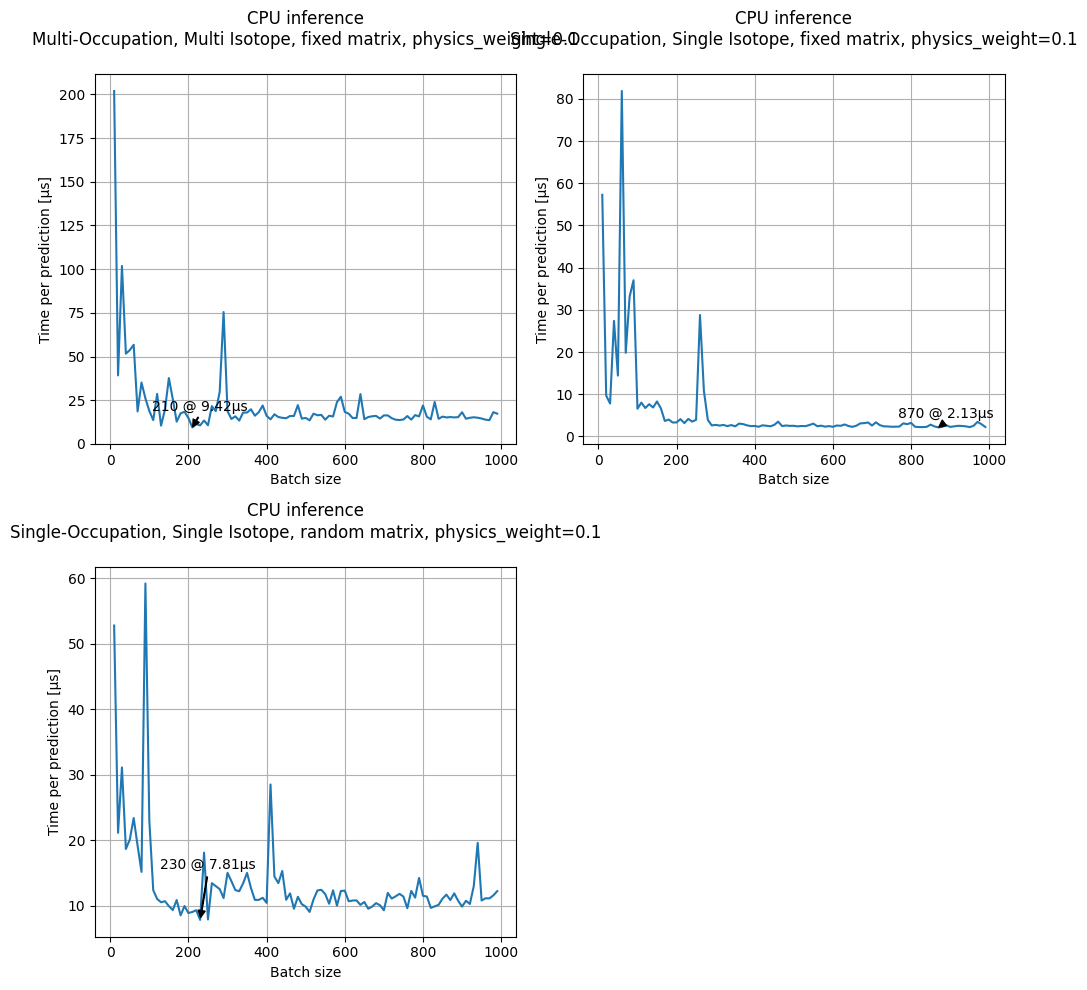

In [3]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
momi_physics = keras.models.load_model('trained_models/MOMI_fixed_physics.keras', compile=False)
momi_physics_cpu = CPUModel(momi_physics)
momi_analytical = MultiOccupationMultiIsotope()
performance_batch_size_plot(momi_analytical,momi_physics_cpu)
plt.subplot(2,2,2)
sosi_physics = keras.models.load_model('trained_models/SOSI_fixed_physics.keras', compile=False)
sosi_physics_cpu = CPUModel(sosi_physics)
sosi_analytical = SingleOccupationSingleIsotope()
performance_batch_size_plot(sosi_analytical,sosi_physics_cpu)
plt.subplot(2,2,3)
sosi_physics_random = keras.models.load_model('trained_models/SOSI_random_physics.keras', compile=False)
sosi_physics_random_cpu = CPUModel(sosi_physics_random)
sosi_analytical = SingleOccupationSingleIsotope()
performance_batch_size_plot(sosi_analytical,sosi_physics_random_cpu)
plt.tight_layout()

# Grid Search Analysis

# SOSI fixed

search space restricted to models taking $<15µs$ to infere

In [4]:
models = load_random_search("random_search/15µs")

  0%|          | 0/101 [00:00<?, ?it/s]

In [5]:
df = pd.DataFrame.from_dict(map(lambda x: x.info(), models))

In [16]:
activation_colors = {
    "relu": "black",
    "tanh": "green",
    "leaky_relu": "red",
    "sigmoid": "blue",
    "linear": "purple",
}

In [20]:
def plot_color_legend(color_dict, title = None):
    for k,v in color_dict.items():
        plt.scatter([],[],color=v,label=k)
    plt.legend(title = title)

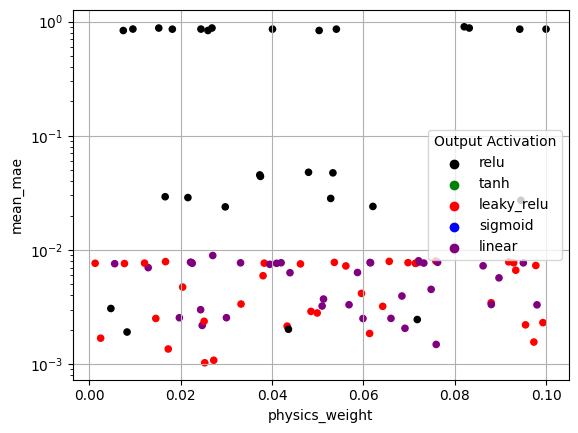

In [22]:
df["output_activation_color"] = df["output_activation"].map(lambda x: activation_colors[x])
df["max_layer_size"] = df["layer_sizes"].map(max)
df.plot(
    x="physics_weight",
    y="mean_mae",
    c="output_activation_color",
    kind="scatter",
    grid=True,
    logy=True,
)
plot_color_legend(activation_colors, "Output Activation")